# Introduction


Overall, we have collected interaction data from more than 30 resources. These resources can be grouped into two major classes, primary and integrated databases. Primary resources such as IntAct or BioGRID focus on collecting experimentally derived molecular interactions. These resources usually were designed for a specific need, therefore, may only contain a fraction of all publicly available data. On the other hand, integrated resources such as STRING aimed at reconstructing the complete interaction network by combining data from primary databases. 

Given that the existing biological data is noisy, the reconstructed networks are usually scored. The scores provide a means to filter unreliable interactions. However, the scores generated from different algorithms usually are incompatible with each other. These scores differ greatly in scale, range and distribution. Even if presented in the same scale or range, scores from two different approaches usually have different meanings. For example, both FunCoup and InBioMap give their scores between 0 and 1. However, FunCoup's score represents the likelihood that two proteins interact given the set of evidence considered. On the other hand, InBioMap calculates confidence scores by combining evidence such as the number interacting partners, the number of reporting publications and the community support for each publication in a heuristic manner. Therefore, the same interaction will be evaluated differently. Furthermore, it is important to be aware that each scoring scheme generally reflects the authors' belief of what constitute a reliable metric for evaluating protein interactions. The assessment is generally based on the number of evidence considered and how good the evidence in evaluating the interactions. As a result, all scoring schemes represent a biased view of the true protein interaction space. Given the heterogeneity and volume of biological data, it is infeasible for a single algorithm to consider all possible evidence to evaluate an interaction. Therefore, rather than relying on a single scoring method, researchers should consider combining information from various algorithms to assess the collected interactions.

In the following sections, we show how to extract scores from various integrated databases. For the interactions collected from primary databases, we use the number of reporting publications as scores. This simple scoring scheme has been used in many studies and is based on the assumption that an interaction is more reliable if it can be reproduced by many publications. 


*Note:*
* Be aware of evidence used to build a scoring system
* Golden reference sets used to evaluate the scoring system
* The underlying assumptions of the scoring system


# Extract scored interactions from various integrated resources

The following sections extract the scores of protein-protein interactions collected from various online resources: ComPPI, ConsensusPathDB (CPDB), FunCoup, GeneMANIA, HIPPIE, HumanNET, InBioMap, IRefIndex, and STRING.

For the four functional interaction resources (GeneMANIA, FunCoup, HumanNET and STRING), only the interactions derived from physical interactions are used.

During score extraction, self-interacting interactions will be excluded. While homodimerization is an important process in constructing a protein complex, it is less useful in our application.

In [1]:
import os
import json
from collections import defaultdict
import itertools
from src import misc
from IPython.display import Image, display
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
    
project_directory = '/projects/ooihs/ReNet/'
map_directory = os.path.join(project_directory, 'results/map/')
final_directory = os.path.join(project_directory, 'results/final/')
data_directory = os.path.join(project_directory, 'data/')

## Using the number of publications as scores

The primary assumption behind this scoring scheme is based on the reproducibility of an interaction. Here, we applied this scheme to IRefIndex and our own collection.

In [2]:
# process the IRefIndex and Our own collection of protein-protein interactions
db_list = ['IRefIndex', 'Human']

for dbname in db_list:
    print(dbname)
    input_file = os.path.join(final_directory, 
                              'interaction.' + dbname.lower() + '.uniprot')

    output_file = os.path.join(final_directory, 'score.' + dbname.lower())
    misc.generate_publication_count_file(input_file, output_file,
                                         exclude_self_interaction=True)
    print()

IRefIndex
Counting publication supports ...
Total number of interaction processed: 185273
Total number of scored interactions: 181464

Human
Counting publication supports ...
Total number of interaction processed: 504044
Total number of scored interactions: 498451



## FunCoup

FunCoup integrates various biological information to infer the functional interactions between protein pairs. In our application, we are only interested in protein interactions with experimental supports. The selection criteria are based on the `Max_category` (the strongest coupling class) is equal to `PPI` and the corresponding functional interactions have `LLR_PIN` (log-likelihood ratios of protein interaction network) values of larger than 0.

In [3]:
from src import funcoup

dbname = 'FunCoup'
input_file = os.path.join(final_directory, 
                          'interaction.' + dbname.lower() + '.uniprot')
output_file = os.path.join(final_directory, 'score.' + dbname.lower())

funcoup.generate_score_file(input_file, output_file, ppi=True, exclude_self_interaction=True)

Generate score file ...
Total number of interaction processed: 5455662
Total number of scored interactions: 455905


## GeneMANIA

For GeneMANIA, we used only the interactions from `Physical_Interactions` studies (refer to [Data standardization](Data standardization.ipynb)). As the same interactions could appear in multiple studies, we used the highest weight for an interaction as the final score.

In [4]:
from src import genemania

dbname = 'GeneMANIA'
input_file = os.path.join(final_directory, 
                          'interaction.' + dbname.lower() + '.uniprot')

output_file = os.path.join(final_directory, 'score.' + dbname.lower())
genemania.generate_score_file(input_file, output_file, exclude_self_interaction=True)

Generate score file ...
Total number of interaction processed: 259319
Total number of scored interactions: 259315


## HIPPIE

The default scores were used.

In [5]:
from src import hippie
        
dbname = 'HIPPIE'    
input_file = os.path.join(final_directory, 
                          'interaction.' + dbname.lower() + '.uniprot')
output_file = os.path.join(final_directory, 'score.' + dbname.lower())
hippie.generate_score_file(input_file, output_file, exclude_self_interaction=True)

Generate score file ...
Total number of interaction processed: 324264
Total number of scored interactions: 320225


## HumanNet

HumanNet also integrates various biological information to construct a human interaction network. Similarly, we only used interactions with experimental supports. The file [`HumanNet.v1.evidence_code.txt`](http://www.functionalnet.org/humannet/HumanNet.v1.evidence_code.txt) lists the evidence sources used in generating the network. Only interactions with the following evidence will be used in this study:

* HS-LC = Literature curated human protein physical interactions
* HS-MS = Human protein complexes from affinity purification/mass spectrometry
* HS-YH = High-throughput yeast 2-hybrid assays among human genes

In [6]:
from src import humannet

dbname = 'HumanNet'
input_file = os.path.join(final_directory, 
                          'interaction.' + dbname.lower() + '.uniprot')
output_file = os.path.join(final_directory, 'score.' + dbname.lower())
humannet.generate_score_file(input_file, output_file, ppi=True, exclude_self_interaction=True)        

Generate score file ...
Total number of interaction processed: 457348
Total number of scored interactions: 59913


## InBioMap

The default scores were used.

In [7]:
from src import inbiomap

dbname = 'InBioMap'
input_file = os.path.join(final_directory, 
                          'interaction.' + dbname.lower() + '.uniprot')
output_file = os.path.join(final_directory, 'score.' + dbname.lower())
inbiomap.generate_score_file(input_file, output_file, exclude_self_interaction=True)

Generate score file ...
Total number of interaction processed: 615154
Total number of scored interactions: 615121


## STRING

STRING provides data downloadable in multiple forms. Here, we use the protein network data with distinction between direct interactions and interologs (transferred from other organisms). This allows us to extract only the direct interactions with experimental supports. Here, only interaction with non-zero `experiments` and `database` evidence sources will be used.

In [8]:
from src import string        
                           
dbname = 'STRING'
input_file = os.path.join(final_directory, 
                          'interaction.' + dbname.lower() + '.uniprot')
output_file = os.path.join(final_directory, 'score.' + dbname.lower())
string.generate_score_file(input_file, output_file, ppi=True, exclude_self_interaction=True)        

Generate score file ...
Total number of interaction processed: 4746181
Total number of scored interactions: 257917


## CPDB

The default scores were used.

In [9]:
from src import cpdb        
                            
dbname = 'CPDB'
input_file = os.path.join(final_directory, 
                          'interaction.' + dbname.lower() + '.uniprot')
output_file = os.path.join(final_directory, 'score.' + dbname.lower())
cpdb.generate_score_file(input_file, output_file, exclude_self_interaction=True)        

Generate score file ...
Total number of interaction processed: 261353
Total number of scored interactions: 261353


## ComPPI

The default scores were used.

In [10]:
from src import comppi        
                            
dbname = 'ComPPI'
input_file = os.path.join(final_directory, 
                          'interaction.' + dbname.lower() + '.uniprot')
output_file = os.path.join(final_directory, 'score.' + dbname.lower())
comppi.generate_score_file(input_file, output_file, exclude_self_interaction=True)        

Generate score file ...
Total number of interaction processed: 174858
Total number of scored interactions: 174813


## Merge IRefIndex to other primary interaction resources to increase the effectiveness of publication supports

The comparative analysis of the selected resources showed that various scoring schemes used in the selected online resources generally are incompatible with each other (see [Comparative analysis](Comparative analysis.ipynb)). The highest correlation obtained is between our collection and IRefIndex, which is based on the simple publication count method. Therefore, it is reasonable to combined IRefIndex into our collection to increase the effectiveness of the counting method.

In [11]:
# individual datasets
datasets = ['bindtranslation', 'biogrid', 'cider', 'deathdomain', 
           'dip', 'hprd', 'htridb', 'hupa', 'huri',
           'innatedb', 'instruct', 'intact', 'kegg',
           'matrixdb', 'mint', 'mppi', 'pdzbase', 'ppep',
           'reactome', 'signalink', 'signor', 'spike',
           'synsysnet', 'tcof', 'trip'            
]

input_files = []

for ds in datasets:
    input_files.append(os.path.join(map_directory, 'interaction.' + ds + '.uniprot'))
input_files.append(os.path.join(final_directory, 'interaction.irefindex.uniprot'))

hgnc_file = os.path.join(data_directory, 'hgnc/hgnc_complete_set.json')
hgnc = misc.load_hgnc_json(hgnc_file)

output_file = os.path.join(final_directory, 'interaction.combined.uniprot')
# combine and filter the interactions based on HGNC
misc.combine_interaction_datasets(input_files, output_file, hgnc['uniprot'])


Combining interactions in datasets...
...Processing bindtranslation
...Processing biogrid
...Processing cider
...Processing deathdomain
...Processing dip
...Processing hprd
...Processing htridb
...Processing hupa
...Processing huri
...Processing innatedb
...Processing instruct
...Processing intact
...Processing kegg
...Processing matrixdb
...Processing mint
...Processing mppi
...Processing pdzbase
...Processing ppep
...Processing reactome
...Processing signalink
...Processing signor
...Processing spike
...Processing synsysnet
...Processing tcof
...Processing trip
...Processing irefindex
Total number of interaction processed: 1061502
Total number of unique interactions: 517969


## Remove retracted publications

The scientific community is aware of the retracted publications, yet the removal of retracted publications is usually not well presented. Here, we showed a simple approach to remove the retracted publications of the collected interactions. 

We first retrieve the PMIDs of retracted publications from PUBMED, using the following query term: `"retracted publication"[pt] or "retraction of publication"[pt]`

Then, all the retracted PMISs are removed from the collected interactions. An interaction will be removed from our collection if it does not have any publication supports after the removal process.

### Retrieve retracted publications from PUBMED

In [12]:
from src import pubmed

output_file = os.path.join(map_directory, 'retracted.pubmed')
pubmed.get_retracted_publication_batch(output_file)

Total number of records to download: 11175
... Downloading record 2001 to 4000
... Downloading record 4001 to 6000
... Downloading record 6001 to 8000
... Downloading record 8001 to 10000
... Downloading record 10001 to 11175


### Remove retracted publications from interactions

For each record, we removed any publication with retracted Pubmed ID. After removal of retracted publications, interactions without any publication support will then be discharged.

In [13]:
"""remove retracted publications"""
input_file = os.path.join(final_directory, 'interaction.combined.uniprot')
output_file = os.path.join(final_directory, 'interaction.publication.uniprot')
retracted_file = os.path.join(map_directory, 'retracted.pubmed')

misc.remove_retracted_publication(input_file, output_file, retracted_file)

# generate scores
score_file = os.path.join(final_directory, 'score.publication')
misc.generate_publication_count_file(output_file, score_file, exclude_self_interaction=True)

Removing publications in dataset...
...Loading retracted publications
...Number of retracted publications: 11175
...Processing interactions
Total number of interaction processed: 517969
Total number of final interactions: 517879
Number of interactions removed: 90
Number of retracted pmid found: 119
Counting publication supports ...
Total number of interaction processed: 517879
Total number of scored interactions: 512190


## Construct golden positive reference set

A golden reference set generally serves as a metric for evaluating the performance of a method. However, we could also use it to transform the scores obtained from different algorithms to a same basis for fair comparison and data integration. Generally, we want to re-weight the original scores into the likelihoods that an interaction occurs by calculating the fraction of interactions with a particular score appear in the golden reference set. Therefore, using the same  golden reference set allows us to standardized the heterogeneous scores obtained from different algorithms. This is also the basic principle behind the Bayesian-based data integration.

We followed the existing practice of constructing a golden positive set by combining manually curated interactions and protein complexes. After the compilation, we then removed protein pairs that could not form direct binding. The following code blocks show the procedure.

### Combined manually curated interactions

We first combine interactions from manually curated data sources.

In [14]:
"""build manually curated human interactions"""
datasets = ['kegg', 'trip', 'spike', 'pdzbase', 'litbm', "ppep",
            'htridb', 'matrixdb', 'synsysnet', 'tcof', 'deathdomain', 
            'signalink', 'innatedb', 'cider', 'reactome', 'signor']

input_files = []

for ds in datasets:
    input_files.append(os.path.join(map_directory, 'interaction.' + ds + '.uniprot'))
    
output_file = os.path.join(map_directory, 'interaction.manual_curated.uniprot')

misc.combine_interaction_datasets(input_files, output_file, hgnc['uniprot'])


Combining interactions in datasets...
...Processing kegg
...Processing trip
...Processing spike
...Processing pdzbase
...Processing litbm
...Processing ppep
...Processing htridb
...Processing matrixdb
...Processing synsysnet
...Processing tcof
...Processing deathdomain
...Processing signalink
...Processing innatedb
...Processing cider
...Processing reactome
...Processing signor
Total number of interaction processed: 366878
Total number of unique interactions: 266305


### Build pair-wise associations from protein complexes

Next, we build pair-wise associations from protein complexes in various databases.

In [15]:
"""build functional associations from pathway collections"""
datasets = [
    ('complex', 'corum'),
    ('complex', 'hprd'),
    ('complex', 'humancyc'),
    ('complex', 'hupa'),
    ('complex', 'intact'),
    ('complex', 'signor')
]

input_files = []

for ds in datasets:
    dtype, db = ds
    input_files.append(os.path.join(map_directory, dtype + '.' + db + '.uniprot'))

output_file = os.path.join(map_directory, 'association.complex.uniprot')

misc.build_pairwise_from_profile(input_files, output_file, hgnc['uniprot'], '9606')


Combining interactions in datasets...
...Processing corum
...Processing hprd
...Processing humancyc
...Processing hupa
...Processing intact
...Processing signor
Total number of interaction processed: 64937
Total number of unique interactions: 33362


### Compile manually curated non-interacting interactions

Similarly, we compiled a set of non-interacting interactions from the manually curated databases.

In [16]:
"""build the negative interactome from Negatome and CiDER"""
datasets = ['negatome', 'cider', 'intact']

input_files = []

for ds in datasets:
    input_files.append(os.path.join(map_directory, 'notinteraction.' + ds + '.uniprot'))
    
output_file = os.path.join(map_directory, 'notinteraction.manual_curated.uniprot')

misc.combine_interaction_datasets(input_files, output_file, hgnc['uniprot'])

Combining interactions in datasets...
...Processing negatome
...Processing cider
...Processing intact
Total number of interaction processed: 2471
Total number of unique interactions: 2468


### Build a golden positive set by combining interacting pairs from manually curated interactions and protein-complexes

Finally, we combined the manually curated interactions and protein complex pairs, and removed any non-interacting interactions to build the final golden positive set.

In [17]:
input_files = [
    os.path.join(map_directory, 'interaction.manual_curated.uniprot'),
    os.path.join(map_directory, 'association.complex.uniprot')
]

output_file = os.path.join(final_directory, 'goldenset.positive.uniprot')
negative_file = os.path.join(map_directory, 'notinteraction.manual_curated.uniprot')
misc.build_golden_positive_set(input_files, output_file, negative_file)

Processing interaction.manual_curated.uniprot
Processing association.complex.uniprot
Total number of interaction processed: 299667
Total number of unique interactions: 291969
Loading negative file notinteraction.manual_curated.uniprot
Number of not interactions loaded: 2468
Total number of interactions checked: 291969
Total number of not interactions removed: 773
Total number of interactions considered as golden positives: 291196


## Calculate the likelihood ratio for each resources

We can estimate the likelihood ratio for a particular score by calculating the fraction of interactions with that score appear in the golden positive and negative sets. However, the raw scores generated by the scoring methods may not be discrete. Furthermore, these scores differ in their range, scale and distribution as shown in the following example.

### Check the score distribution of each dataset

Publication
Min: 1.0
Max: 412.0


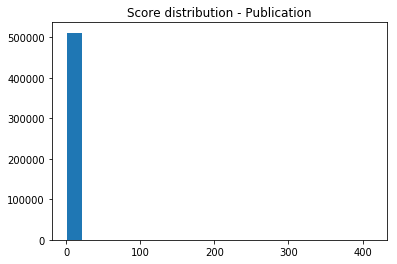


ComPPI
Min: 0.0
Max: 1.0


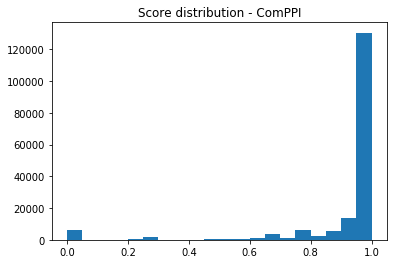


CPDB
Min: 0.00373759
Max: 1.0


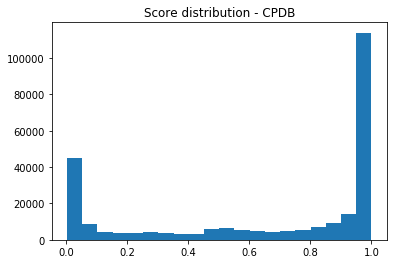


FunCoup
Min: 0.1
Max: 1.0


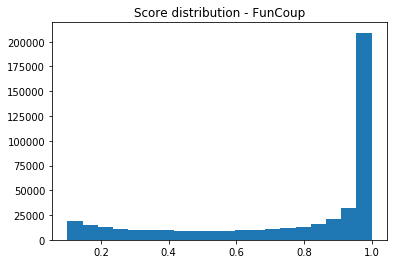


GeneMANIA
Min: 0.00018
Max: 1.0


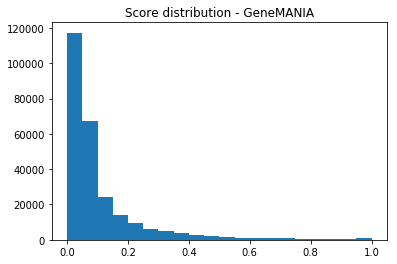


HIPPIE
Min: 0.0
Max: 1.0


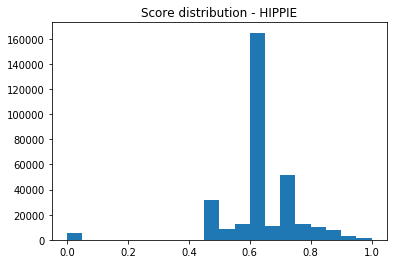


HumanNET
Min: 0.409053285915692
Max: 4.25685629760062


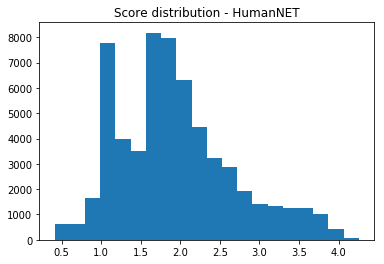


InBioMap
Min: 0.139
Max: 1.0


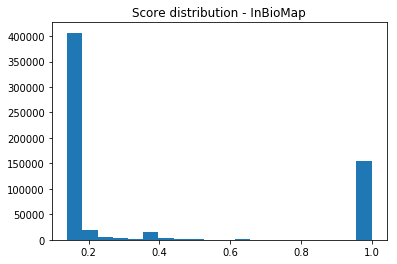


STRING
Min: 0.36
Max: 0.999


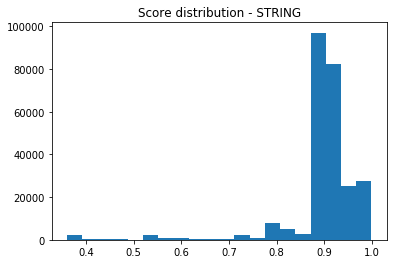

In [18]:
datasets = ['Publication', 'ComPPI', 'CPDB', 'FunCoup', 'GeneMANIA', 
            'HIPPIE', 'HumanNET', 'InBioMap', 'STRING']

for ds in datasets:
    scores = []
    input_file = os.path.join(final_directory, 'score.' + ds.lower())
    with open(input_file) as ifh:
        for line in ifh:
            col = line.strip().split('\t')
            scores.append(float(col[2]))
    print(ds)
    print('Min:', min(scores))
    print('Max:', max(scores))
   
    plt.hist(scores, bins=20)
    plt.title('Score distribution - ' + ds)
    plt.show()
    print()
    

### Calculate the likelihood ratio

As shown in above example, we need a way to group the interactions with similar scores together for each algorithm. For CPDB, FunCoup, GeneMANIA, HIPPIE, InBIoMap, and STRING, we split the scores evenly into 10 bins between 0 and 1. For HumanNet, the scores are normalized to range between 0 and 1, and grouped into 10 bins. For the publication count, the following bins were used, 1, 2-3, 4-5, 6-7, 8-9, 10-14, 15-19, >= 20.

Given that the true golden positive set is unknown, the collected golden positives might still contain noises. Therefore, we randomly sampled 90% of the complied golden positives as the golden positive set. Similarly, the true golden negative set is also unknown. Many existing studies used incompatible biological information to generate golden negative sets. For example, using protein pairs co-localized to distinct cellular compartments as the golden negative set. However, the constructed golden negative set is biased toward a particular form of negative interactions. Furthermore, it excludes all negative interactions co-localized to the same compartment or annotation.

The true negative space is significantly larger than the true positive space. Therefore, the chance of randomly select a true interaction from the complete space is very small. Based on this assumption, we generated a randomized background of size 100 times the randomly sampled golden positive set as the golden negative set.

In [19]:
from src import likelihood_ratio

lr_directory = os.path.join(project_directory, 'results/lr')
if not os.path.isdir(lr_directory):
    os.makedirs(lr_directory)
    
positive_file = os.path.join(final_directory, 'goldenset.positive.uniprot')
positive_sample_size = '90' # use 90% of the compiled golden positive set
negative_sample_size = '100' # generate the 100x positive goldenset positive

datasets = [('Publication', '2'), # publication count bins
            ('CPDB', '1'), # 10 bins between 0 and 1
            ('ComPPI', '1'),
            ('FunCoup', '1'), 
            ('GeneMANIA', '1'), 
            ('HIPPIE', '1'), 
            ('HumanNET', '4'), # normalized to 0 and 1 and grouped into 10 bins
            ('InBioMap', '1'), 
            ('STRING', '1')]

random_seed = '103819834'
for ds in datasets:
    fname, mode = ds
    print('Calculationg likelihood ratio -', fname)
    score_file = os.path.join(final_directory, 'score.' + fname.lower())
    output_file = os.path.join(lr_directory, 'likelihood.' + fname.lower())
    args = [positive_file,
            positive_sample_size,
            score_file,
            output_file,
            random_seed,
            negative_sample_size,
            mode]
    likelihood_ratio.output_likelihood_ratio(args)

Calculationg likelihood ratio - Publication
Calculationg likelihood ratio - CPDB
Calculationg likelihood ratio - ComPPI
Calculationg likelihood ratio - FunCoup
Calculationg likelihood ratio - GeneMANIA
Calculationg likelihood ratio - HIPPIE
Calculationg likelihood ratio - HumanNET
Calculationg likelihood ratio - InBioMap
Calculationg likelihood ratio - STRING


### Display the calculated likelihood ratios

Generally, we would expect the higher the scores, the higher the corresponding likelihood ratios. This is generally true for most of the cases as shown below. The estimation of the likelihood ratio provides a means for users to select the high confidence interactions for data analysis. Generally, users should compile a golden positive set that is relevant to their study. After re-weighting, users can then use interactions with a particular likelihood ratio cutoff as the high confidence set.

Publication


,Number of positives,Number of negatives,P(bin|pos),P(bin|neg),Likelihood Ratio
1 - 1,149139,33037,0.615890,0.831287,0.740888
2 - 3,76296,5907,0.315075,0.148634,2.119808
4 - 5,9829,435,0.040590,0.010946,3.708359
6 - 7,3126,181,0.012909,0.004554,2.834471
8 - 9,1403,100,0.005794,0.002516,2.302604
10 - 14,1404,51,0.005798,0.001283,4.518129
15 - 19,517,8,0.002135,0.000201,10.606259
>= 20,438,23,0.001809,0.000579,3.125417


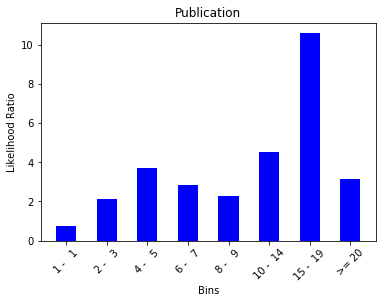


CPDB


,Number of positives,Number of negatives,P(bin|pos),P(bin|neg),Likelihood Ratio
"[ 0.00, 0.10)",14387,5866,0.148049,0.238001,0.622055
"[ 0.10, 0.20)",2753,811,0.028330,0.032905,0.860966
"[ 0.20, 0.30)",2539,823,0.026128,0.033391,0.782462
"[ 0.30, 0.40)",2171,718,0.022341,0.029131,0.766895
"[ 0.40, 0.50)",2233,820,0.022979,0.033270,0.690678
"[ 0.50, 0.60)",3925,1425,0.040390,0.057816,0.698595
"[ 0.60, 0.70)",2902,974,0.029863,0.039518,0.755682
"[ 0.70, 0.80)",3441,1050,0.035410,0.042602,0.831182
"[ 0.80, 0.90)",5507,1644,0.056670,0.066702,0.849599
"[ 0.90, 1.00]",57319,10516,0.589841,0.426665,1.382447


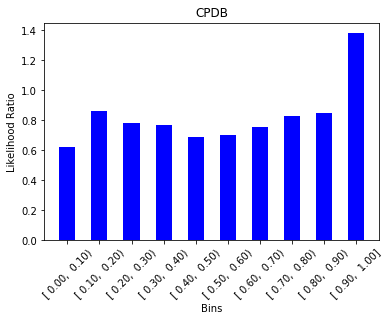


ComPPI


,Number of positives,Number of negatives,P(bin|pos),P(bin|neg),Likelihood Ratio
"[ 0.00, 0.10)",2502,376,0.028536,0.042708,0.668158
"[ 0.10, 0.20)",8,1,0.000091,0.000114,0.803285
"[ 0.20, 0.30)",1064,141,0.012135,0.016015,0.757708
"[ 0.30, 0.40)",36,8,0.000411,0.000909,0.451848
"[ 0.40, 0.50)",266,28,0.003034,0.003180,0.953901
"[ 0.50, 0.60)",499,58,0.005691,0.006588,0.863877
"[ 0.60, 0.70)",2019,303,0.023027,0.034416,0.669073
"[ 0.70, 0.80)",2940,392,0.033531,0.044525,0.753079
"[ 0.80, 0.90)",3403,467,0.038812,0.053044,0.731686
"[ 0.90, 1.00]",74943,7030,0.854733,0.798501,1.070423


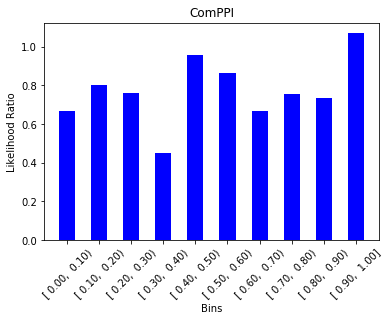


FunCoup


,Number of positives,Number of negatives,P(bin|pos),P(bin|neg),Likelihood Ratio
"[ 0.10, 0.20)",4779,4934,0.066573,0.082618,0.805796
"[ 0.20, 0.30)",3433,3469,0.047823,0.058087,0.823298
"[ 0.30, 0.40)",2846,2924,0.039646,0.048961,0.809739
"[ 0.40, 0.50)",2663,2632,0.037096,0.044072,0.841730
"[ 0.50, 0.60)",2729,2650,0.038016,0.044373,0.856732
"[ 0.60, 0.70)",3027,3011,0.042167,0.050418,0.836352
"[ 0.70, 0.80)",3552,3490,0.049480,0.058438,0.846710
"[ 0.80, 0.90)",5332,5026,0.074276,0.084158,0.882582
"[ 0.90, 1.00]",43425,31585,0.604923,0.528876,1.143790


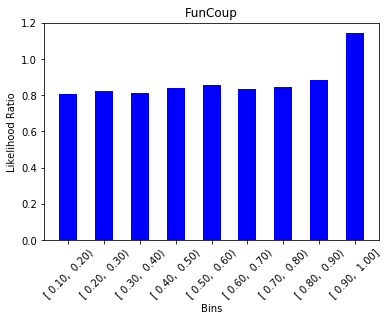


GeneMANIA


,Number of positives,Number of negatives,P(bin|pos),P(bin|neg),Likelihood Ratio
"[ 0.00, 0.10)",56207,18688,0.624044,0.732891,0.851482
"[ 0.10, 0.20)",15334,3731,0.170247,0.146319,1.163531
"[ 0.20, 0.30)",7467,1394,0.082903,0.054669,1.516461
"[ 0.30, 0.40)",4054,702,0.045010,0.027530,1.634912
"[ 0.40, 0.50)",2365,368,0.026258,0.014432,1.819412
"[ 0.50, 0.60)",1591,249,0.017664,0.009765,1.808917
"[ 0.60, 0.70)",946,129,0.010503,0.005059,2.076105
"[ 0.70, 0.80)",876,94,0.009726,0.003686,2.638299
"[ 0.80, 0.90)",458,58,0.005085,0.002275,2.235555
"[ 0.90, 1.00]",771,86,0.008560,0.003373,2.538071


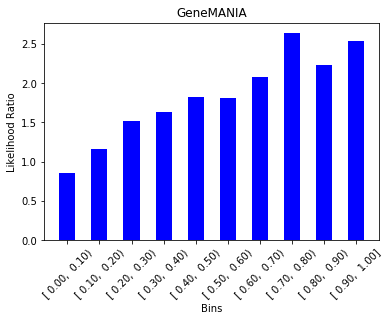


HIPPIE


,Number of positives,Number of negatives,P(bin|pos),P(bin|neg),Likelihood Ratio
"[ 0.00, 0.10)",2376,495,0.022416,0.015370,1.458454
"[ 0.10, 0.20)",48,9,0.000453,0.000279,1.620504
"[ 0.20, 0.30)",24,5,0.000226,0.000155,1.458454
"[ 0.30, 0.40)",2,1,0.000019,0.000031,0.607689
"[ 0.40, 0.50)",3698,4136,0.034888,0.128423,0.271668
"[ 0.50, 0.60)",11360,1349,0.107175,0.041887,2.558691
"[ 0.60, 0.70)",41877,19866,0.395085,0.616842,0.640496
"[ 0.70, 0.80)",28921,5656,0.272852,0.175619,1.553658
"[ 0.80, 0.90)",13832,611,0.130497,0.018972,6.878523
"[ 0.90, 1.00]",3857,78,0.036389,0.002422,15.024722


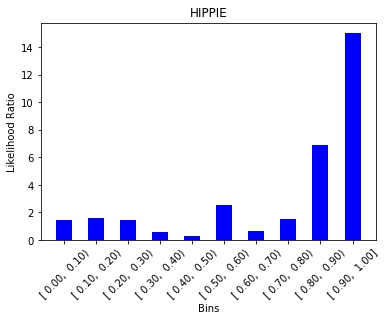


HumanNET


,Number of positives,Number of negatives,P(bin|pos),P(bin|neg),Likelihood Ratio
"[ 0.00, 0.10)",1047,7,0.026301,0.009409,2.795447
"[ 0.10, 0.20)",8360,42,0.210008,0.056452,3.720142
"[ 0.20, 0.30)",6396,35,0.160671,0.047043,3.415411
"[ 0.30, 0.40)",10563,206,0.265349,0.276882,0.958347
"[ 0.40, 0.50)",3953,246,0.099302,0.330645,0.300327
"[ 0.50, 0.60)",3299,119,0.082873,0.159946,0.518129
"[ 0.60, 0.70)",2007,48,0.050417,0.064516,0.781464
"[ 0.70, 0.80)",1843,23,0.046297,0.030914,1.497615
"[ 0.80, 0.90)",1912,14,0.048031,0.018817,2.552480
"[ 0.90, 1.00]",428,4,0.010752,0.005376,1.999799


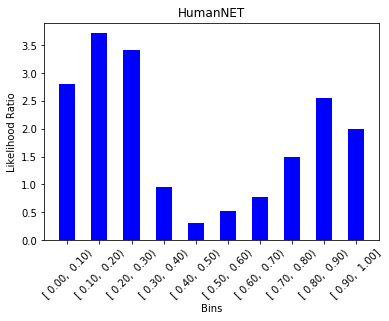


InBioMap


,Number of positives,Number of negatives,P(bin|pos),P(bin|neg),Likelihood Ratio
"[ 0.10, 0.20)",59616,53283,0.543520,0.708513,0.767128
"[ 0.20, 0.30)",6433,1365,0.058650,0.018151,3.231280
"[ 0.30, 0.40)",7640,1651,0.069654,0.021954,3.172780
"[ 0.40, 0.50)",2287,296,0.020851,0.003936,5.297466
"[ 0.50, 0.60)",606,68,0.005525,0.000904,6.110228
"[ 0.60, 0.70)",803,85,0.007321,0.001130,6.477245
"[ 0.70, 0.80)",207,19,0.001887,0.000253,7.469825
"[ 0.80, 0.90)",99,17,0.000903,0.000226,3.992822
"[ 0.90, 1.00]",31994,18420,0.291690,0.244934,1.190893


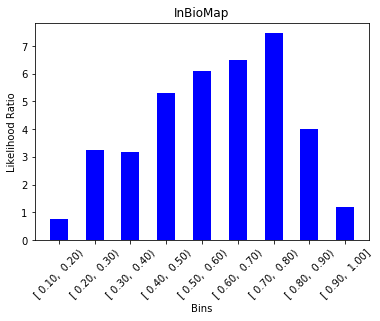


STRING


,Number of positives,Number of negatives,P(bin|pos),P(bin|neg),Likelihood Ratio
"[ 0.30, 0.40)",15,398,0.000277,0.012410,0.022340
"[ 0.40, 0.50)",18,145,0.000333,0.004521,0.073584
"[ 0.50, 0.60)",76,571,0.001405,0.017804,0.078897
"[ 0.60, 0.70)",66,143,0.001220,0.004459,0.273583
"[ 0.70, 0.80)",115,455,0.002125,0.014187,0.149819
"[ 0.80, 0.90)",10487,1036,0.193823,0.032302,6.000288
"[ 0.90, 1.00]",43329,29324,0.800817,0.914318,0.875863


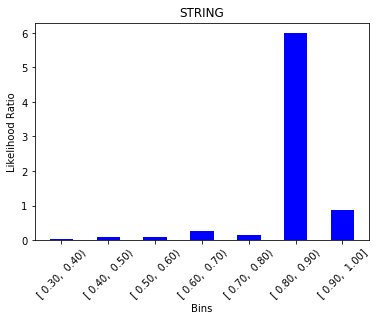

In [20]:
lrtables = {}

def plot_likelihood_ratio(lrtable, title='', rotation=0):
    """Plot the likelihood ratio.
    
    A simple utility to plot the likelihood ratios as a bar chart.

    Args:
        lrtable (pandas dataframe): The likelihood ratio table
        title (str): The title of the plot
        rotation (int): Rotate the x-axis labels
        
    Returns:
        none

    """
    fig, ax = plt.subplots()
    
    ind = np.arange(len(lrtable.index))
    width = 0.5
    
    bars  = ax.bar(ind, lrtable['Likelihood Ratio'], width, color='b')
    
    ax.set_title(title)
    ax.set_xlabel('Bins')
    ax.set_ylabel('Likelihood Ratio')
    ax.set_xticks(ind)
    ax.set_xticklabels(list(lrtable.index), rotation=rotation)
    
    plt.show()
    

for ds in datasets:
    fname, mode = ds
    input_file = os.path.join(lr_directory, 'likelihood.' + fname.lower())
    lrtables[fname] = likelihood_ratio.load_likelihood_ratio_table(input_file)
    
    print(fname)
    display(lrtables[fname])
    print()
    plot_likelihood_ratio(lrtables[fname], fname, 45)
    print()

## Integrate the network using a Naive Bayesian-based approach

After obtaining the likelihood ratio from each resource, we combined them in a naive Bayesian fashion. The resulted interaction network is a representation of the joint probability distribution among the resources. If we know the true number of protein interactions, then the prior odds of finding a positive interaction is given as:

$$ O_{prior} = \frac{P(pos)}{P(neg)},$$

where $P(pos)$ and $P(neg)$ are the probability of finding a positive or negative interaction respectively. The prior odds is generally unknown. Therefore, we are interested in finding the posterior odds of an interaction occurs after considering the given evidence. The Bayesian formalism provides an elegant way to calculate the posterior odds,

$$ O_{posterior} = \frac{P(pos|f_1,...,f_n)}{P(neg|f_1,...,f_n)}$$

Using the Bayes' rule, the above equation can be rewritten as,


\begin{align}
O_{posterior} &= \frac{P(pos|f_1,...,f_n)}{P(neg|f_1,...,f_n)} \\
 &= \frac{\frac{P(f_1,...,f_n|pos) \times P(pos)}{P(f1,...,fn)}}{\frac{P(f1,...,f_n|neg) \times P(neg)}{P(f1,...,fn)}} \\
 &= \frac{P(f_1,...,f_n|pos) \times P(pos)}{P(f1,...,f_n|neg) \times P(neg)} \\
 &= \frac{P(pos)}{P(neg)} \times \frac{P(f_1,...,f_n|pos)}{P(f_1,...,f_n|neg)} \\
 &= O_{prior} \times LR(f_1,...,f_n)
\end{align}

Given that $O_{prior}$ is a constant for an organism, we are interested in finding the $O_{posterior}$, which is directly proportional to the likelihood ratio, $LR(f_1,...,f_n)$. Calculating the $LR$ is generally a computational intensive task. However, under the assumption that all considered features are conditionally independent (naive assumption), the $LR(f_1,...,f_n)$ can be calculated as the product of the individual likelihood ratio.

The comparative analysis result showed that the considered features are generally not well correlated. Therefore, we could integrate the network using the Naive Bayesian approach.

In [21]:
input_files = []
for ds in datasets:
    fname, mode = ds
    score_file = os.path.join(final_directory, 'score.' + fname.lower())
    input_files.append(score_file)

output_file = os.path.join(final_directory, 'integrated.network.uniprot')
likelihood_ratio.build_lr_network(input_files, lr_directory, output_file)

Processing  /projects/ooihs/ReNet/results/final/score.publication
Processing  /projects/ooihs/ReNet/results/final/score.cpdb
Processing  /projects/ooihs/ReNet/results/final/score.comppi
Processing  /projects/ooihs/ReNet/results/final/score.funcoup
Processing  /projects/ooihs/ReNet/results/final/score.genemania
Processing  /projects/ooihs/ReNet/results/final/score.hippie
Processing  /projects/ooihs/ReNet/results/final/score.humannet
Processing  /projects/ooihs/ReNet/results/final/score.inbiomap
Processing  /projects/ooihs/ReNet/results/final/score.string
Total number of interactions: 1231170
